# Regression in Prediction
build a simple linear regression model to fit data

build a multiple regression model to fit data

report the results of regression analysis



## Linear regression
linear regression models are a good starting point for all kinds of regression tasks. Such models are popular because they can be fit very quickly (blazing fast!), and are very interpretable. You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

## Simple linear regression

In [1]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt

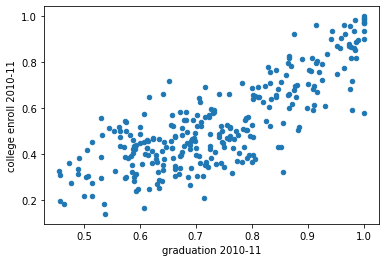

In [3]:
# Import data
school = pd.read_csv("ICE1_Data.csv")
graduationCollege = school[['graduation 2010-11', 'college enroll 2010-11']].dropna()

graduation = graduationCollege.loc[:,"graduation 2010-11"].values.reshape(-1, 1)
college = graduationCollege.loc[:,"college enroll 2010-11"].values.reshape(-1, 1)

graduationCollege.plot.scatter(x = 'graduation 2010-11', y = 'college enroll 2010-11')

In [4]:
model = LinearRegression()
model.fit(graduation, college)
print("The intercept is: ", model.intercept_)
print("The slope is: ", model.coef_)

The intercept is:  [-0.27965123]
The slope is:  [[1.09914898]]


In [5]:
college_pred = model.predict(graduation)

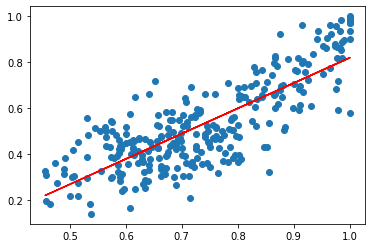

In [6]:
plt.scatter(graduation, college)
plt.plot(graduation, college_pred, color = 'red')
plt.show()

## A more realistic example with multiple independent variables

In [10]:
videoData = pd.read_csv("ICE3_Data.csv")
videoData

,stid,year,video,participation,watch.time,confusion.points,key.points
0,1,2018,A,1,16.5,6,6
1,2,2018,A,0,0.0,0,0
2,3,2018,A,1,9.0,4,6
3,4,2018,A,1,20.0,8,5
4,5,2018,A,1,12.0,8,5
...,...,...,...,...,...,...,...
295,56,2019,E,1,12.0,6,2
296,57,2019,E,1,17.5,10,1
297,58,2019,E,1,6.0,4,1
298,59,2019,E,0,0.0,0,0


In [11]:
videoData.describe()

,stid,year,participation,watch.time,confusion.points,key.points
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,30.500000,2018.500000,0.743333,9.302500,4.426667,2.326667
std,17.347038,0.500835,0.437524,8.396475,3.606658,1.921526
min,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,2018.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,2018.500000,1.000000,8.375000,5.000000,2.000000
75%,45.250000,2019.000000,1.000000,15.750000,8.000000,4.000000
max,60.000000,2019.000000,1.000000,32.500000,13.000000,7.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98bca5db50>,
      dtype=object)

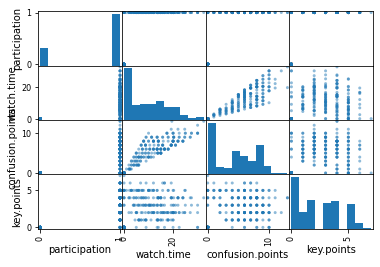

In [12]:
pd.plotting.scatter_matrix(videoData.iloc[:,3:])

In [13]:
Xs = videoData[["participation", "confusion.points", "key.points"]].to_numpy()
watchTime = videoData.loc[:,"watch.time"].values.reshape(-1, 1)

In [14]:
videoModel = LinearRegression()
videoModel.fit(Xs, watchTime)
print("The intercept is: ", videoModel.intercept_)
print("The slope is: ", videoModel.coef_)

The intercept is:  [-3.55271368e-15]
The slope is:  [[ 0.55757518  2.08731237 -0.15120358]]


In [15]:
from statsmodels.api import OLS
videoModelOLS = OLS(watchTime, Xs)
videoModelOLSFit = videoModelOLS.fit()
print(videoModelOLSFit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              1117.
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                   2.36e-161
Time:                        00:08:36   Log-Likelihood:                         -807.73
No. Observations:                 300   AIC:                                      1621.
Df Residuals:                     297   BIC:                                      1633.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------